# Clustering Evaluation with Silhouette Score

https://docs.google.com/presentation/d/1wQLpAU38DZo_Nqir6Zp1EeYgyVePsCX4m1p2wTMRAic/edit?usp=sharing

### Silhouette Score

$$ s(i) =  \dfrac{b(i)-a(i)}{max(a(i),  b(i))} $$


a(𝑖): 𝑖번째 개체와 같은 군집에 속한 요소들 간 거리들의 평균  
b(𝑖): 𝑖번째 개체와 다른 군집에 속한 요소들 간 거리들의 평균을 군집마다 각각 구한 뒤, 이 가운데 가장 작은 값(최인접 군집내 요소들 간의 평균 거리)  
s(𝑖): -1 ~ 1 사이의 값을 가짐. 숫자가 클 수록 군집 분류가 잘 되었다고 볼 수 있음. 일반적으로 0.5 보다 클 경우 군집 형성이 적합하다고 평가함.  

#### cases
1. a(𝑖) = 0 -> s(𝑖) = 1
  - 가장 이상적인 케이스.
  - 한 군집 내 모든 개체가 동일한 경우
1. b(𝑖) = 0 -> s(𝑖) = -1
  - 가장 최악의 케이스.
  - 서로 다른 군집이 하나도 구분되지 않는 경우.
1. a(𝑖) = b(𝑖) -> s(𝑖) = 0
  - 지금 클러스터나 이웃 클러스터나 어디 있든 상관 없다.
1. a(𝑖) <<< b(𝑖) -> s(𝑖) ≒ 1
  - 인접 군집이 멀리 떨어져 있다.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## K-means Example
Customer information

### Step1: Load Dataset

In [2]:
# 'Customers.csv' 파일 읽기 pd.read_csv()
# df shape 확인 

df = pd.read_csv("Customers.csv")
df.shape

(200, 5)

In [3]:
# df head 행 보기

df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# column별로 unique 종류 수 확인

df.nunique()

CustomerID       200
Gender             2
Age               51
AnnualIncome      64
SpendingScore     84
dtype: int64

In [5]:
# set index as 'CustomerID'

df.set_index('CustomerID', inplace=True)

In [6]:
# df descriptive statistics

df.describe()

,Age,AnnualIncome,SpendingScore
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


### Step2: Visualize Dataset

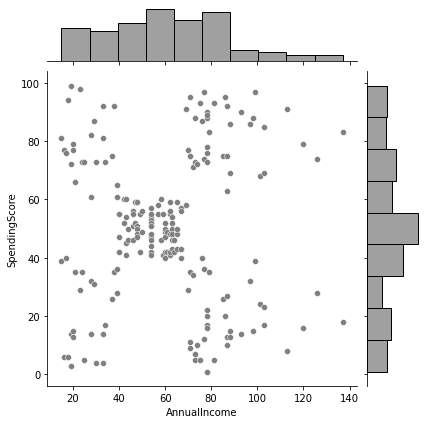

In [7]:
# sns.jointplot 활용한 시각화. x='AnnualIncome', y='SpendingScore'

sns.jointplot(x='AnnualIncome', y='SpendingScore', data = df, color = 'gray')

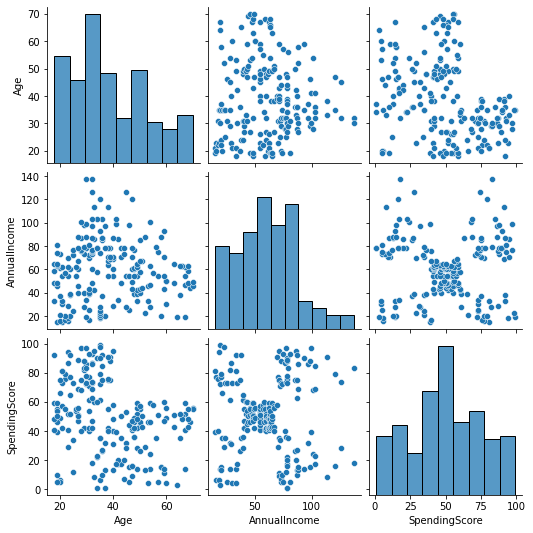

In [8]:
# sns.pairplot()

sns.pairplot(df)

### Step3: Find Optimal # of Clusters

In [9]:
# X에 -1번째 column까지 할당 np.array

X = df.iloc[:, 2:].values

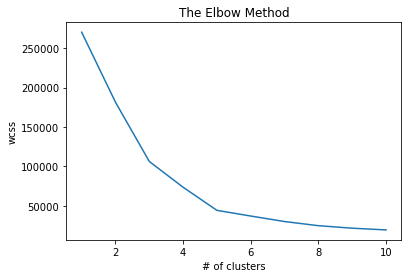

In [10]:
# find cluster number in KMeans 

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('# of clusters')
plt.ylabel('wcss')
plt.show()

### Step4: Train Model

In [11]:
# kmeans에 KMeans() 모형 학습. with n_cluster=5, init='k-means++'
# y_kmeans에 predict 값 저장

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)
y_kmeans = kmeans.fit_predict(X)

# kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)
# kmeans.fit(X)
# y_kmeans = kmeans.predict(X)

In [12]:
# y_kmeans 확인

y_kmeans

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0,
       3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 2, 0, 2, 4, 2, 4, 2,
       0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2], dtype=int32)

In [13]:
# cluster_centers 확인

kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571]])

### Step5: Analyze Result

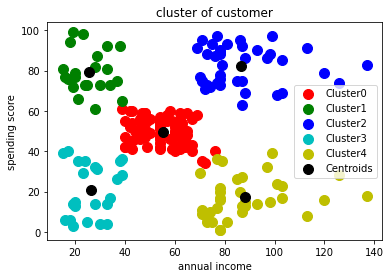

In [14]:
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='r', label='Cluster0')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='g', label='Cluster1')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='b', label='Cluster2')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=100, c='c', label='Cluster3')
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s=100, c='y', label='Cluster4')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='black', label='Centroids')

plt.title('cluster of customer')
plt.xlabel('annual income')
plt.ylabel('spending score')
plt.legend()
plt.show()


## Step6: Cluster Evaluation

In [15]:
# df_result 생산. 기존 df에 cluster 정보(y_kmeans) 포함.

df_result = df.iloc[:, 2:].copy()
df_result['cluster'] = y_kmeans

In [16]:
# from sklearn.metrics import silhouette_samples, silhouette_score
# silhouette_samples 이용해 각각의 data point의 Silhouette_Coefficients 를 구하기.
# silhouette_score 이용해 각각의 평균 score 구하기.

from sklearn.metrics import silhouette_samples, silhouette_score

df_result['Silhouette_Coefficients'] = silhouette_samples(X, y_kmeans)
print("average silhouette_score:", silhouette_score(X, y_kmeans))
df_result.head()

average silhouette_score: 0.553931997444648


,AnnualIncome,SpendingScore,cluster,Silhouette_Coefficients
CustomerID,,,,
1,15,39,3,0.417005
2,15,81,1,0.696378
3,16,6,3,0.639953
4,16,77,1,0.696483
5,17,40,3,0.392300


---

## Hierarchical Clustering Example
Customer information

### Step1: Load Dataset

In [17]:
# 'Customers.csv' 파일 읽기 pd.read_csv()
# df shape 확인 

df = pd.read_csv("Customers.csv")
df.shape

(200, 5)

In [18]:
# df head 행 보기

df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [19]:
# column별로 unique 종류 수 확인

df.nunique()

CustomerID       200
Gender             2
Age               51
AnnualIncome      64
SpendingScore     84
dtype: int64

In [20]:
# set index as 'CustomerID'

df.set_index('CustomerID', inplace=True)

In [21]:
# df descriptive statistics

df.describe()

,Age,AnnualIncome,SpendingScore
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


### Step2: Visualize Dataset

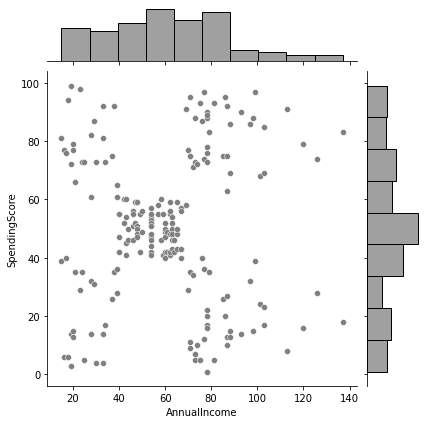

In [22]:
# sns.jointplot 활용한 시각화. x='AnnualIncome', y='SpendingScore'

sns.jointplot(x='AnnualIncome', y='SpendingScore', data = df, color = 'gray')

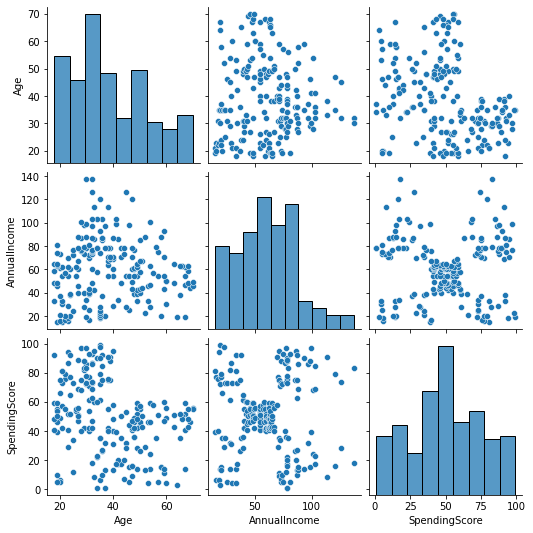

In [23]:
# sns.pairplot()

sns.pairplot(df)

### Step3: Find Optimal # of Clusters

In [24]:
# X에 -1번째 column까지 할당 np.array

X = df.iloc[:, 2:].values

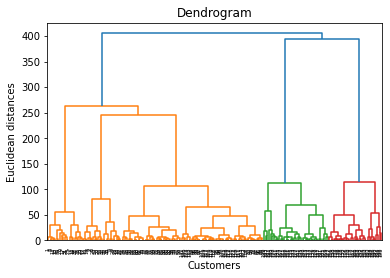

In [25]:
# from scipy.cluster import hierarchy
# dendrogram으로 원하는 cluster 수 찾기

from scipy.cluster import hierarchy
hc = hierarchy.linkage(X, method = 'ward')  # ward: minimum variance
dendrogram = hierarchy.dendrogram(hc)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [26]:
# check linkage
# The hierarchical clustering encoded as a linkage matrix. 
# linkage matrix: 
# column 1. index of a class
# column 2. index of other class
# column 3. distance between class
# column 4. sum of the numbers in a class and other class.()

hc[-5:]

array([[384.        , 386.        , 113.88601652,  32.        ],
       [391.        , 392.        , 245.65460099, 108.        ],
       [387.        , 395.        , 262.5626341 , 129.        ],
       [393.        , 394.        , 394.8596576 ,  71.        ],
       [396.        , 397.        , 405.66004104, 200.        ]])

In [27]:
# dendrogram으로 원하는 cluster 수 찾기
# dendrogram 에서 distance가 가장 크게 변화하는 cluster 수 찾기

first_distance = hc[:, 2][0]
subtraction_distance = []
for distance in hc[:, 2]:
    subtraction_distance.append(distance - first_distance)
    first_distance = distance
    
n_clusters = X.shape[0] - subtraction_distance.index(max(subtraction_distance))
n_clusters

3

### Step4: Train Model

In [28]:
# from sklearn.cluster import AgglomerativeClustering
# model: AgglomerativeClustering(), 
# param: n_clusters = n_clusters, affinity = 'euclidean', linkage = 'ward')
# y_hc에 predict 값 저장

from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters = n_clusters, affinity = 'euclidean', linkage = 'ward')
model.fit(X)
y_hc = model.labels_

### Step5: Analyze Result

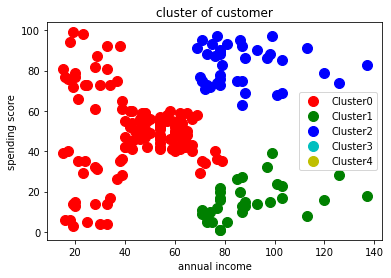

In [29]:
plt.scatter(X[y_hc==0, 0], X[y_hc==0, 1], s=100, c='r', label='Cluster0')
plt.scatter(X[y_hc==1, 0], X[y_hc==1, 1], s=100, c='g', label='Cluster1')
plt.scatter(X[y_hc==2, 0], X[y_hc==2, 1], s=100, c='b', label='Cluster2')
plt.scatter(X[y_hc==3, 0], X[y_hc==3, 1], s=100, c='c', label='Cluster3')
plt.scatter(X[y_hc==4, 0], X[y_hc==4, 1], s=100, c='y', label='Cluster4')

plt.title('cluster of customer')
plt.xlabel('annual income')
plt.ylabel('spending score')
plt.legend()
plt.show()


## Step6: Clsuter Evaluation

In [30]:
# df_result 생산. 기존 df에 cluster 정보(y_hc) 포함.

df_result = df.iloc[:, 2:].copy()
df_result['cluster'] = y_hc

In [31]:
# from sklearn.metrics import silhouette_samples, silhouette_score
# silhouette_samples 이용해 각각의 data point의 Silhouette_Coefficients 를 구하기.
# silhouette_score 이용해 각각의 평균 score 구하기.

from sklearn.metrics import silhouette_samples, silhouette_score

df_result['Silhouette_Coefficients'] = silhouette_samples(X, y_hc)
print("average silhouette_score:", silhouette_score(X, y_hc))
df_result.head()

average silhouette_score: 0.4618340266628975


,AnnualIncome,SpendingScore,cluster,Silhouette_Coefficients
CustomerID,,,,
1,15,39,0,0.496119
2,15,81,0,0.333668
3,16,6,0,0.254481
4,16,77,0,0.367768
5,17,40,0,0.508020
